In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
import numpy as np
from Main_Function import fun_vor_main

In [2]:
def check_non_expansive(dist_to_previous, plot=True):
    """
    Check non-expansiveness using distance_from_found_to_previous
    produced by fun_vor_main.

    Parameters
    ----------
    dist_to_previous : dict
        Keys like 'iteration_1', 'iteration_2', ...
        Each value is a list of N floats = per-seed displacement.

    plot : bool, default=True
        If True, plots the semilog decay of the mean distance.

    Returns
    -------
    mean_distances : list of float
        Mean displacement per iteration.

    growth_factors : list of float
        Ratios mean_distances[k] / mean_distances[k-1], k >= 1.
    """
    keys = sorted(dist_to_previous.keys(),
                  key=lambda x: int(x.split("_")[1]))

    mean_distances = []
    for k in keys:
        mean_distances.append(np.mean(dist_to_previous[k]))

    growth_factors = []
    for k in range(1, len(mean_distances)):
        if mean_distances[k-1] > 0:
            growth_factors.append(mean_distances[k] / mean_distances[k-1])
        else:
            growth_factors.append(0.0)

    if plot:
        iters = np.arange(1, len(mean_distances)+1)
        plt.semilogy(iters, mean_distances, marker='o')
        plt.xlabel("Iteration")
        plt.ylabel("Mean displacement (‖xₖ₊₁ - xₖ‖₂)")
        plt.title("Non-expansiveness check")
        plt.grid(True, which="both", ls="--")
        plt.show()

    return mean_distances, growth_factors

In [3]:
points = np.random.rand(50, 2)
vor = Voronoi(points,qhull_options='Qc')

explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = fun_vor_main(vor, points)

print('dist_to_previous:', dist_to_previous)


            Converged after 109 iterations
dist_to_previous: {'iteration_1': [0.30689207786006745, 0.15070712035629782, 0.14668926106452032, 0.2497481243216609, 0.07696203721407173, 0.20373256766917408, 0.31753302467801603, 0.32275596069036416, 0.291920208802464, 0.0933338803704651, 0.03267297668793759, 0.25174168651699286, 0.08695348367252109, 0.13554872715959304, 0.11571181176650536, 0.16183106231504354, 0.0707532297497214, 0.05200535137164217, 0.009233343486610684, 0.009299189442394981, 0.035500002067871766, 0.023450431784517587, 1.1919869173536959, 0.20313681051741717, 1.34709154125401, 0.10791093609758373, 0.35922690341667407, 0.05464261631584979, 0.05188043978439035, 0.040276800657889036, 0.03918572054116246, 0.01818062347278831, 0.0891757709332241, 0.08032463246333062, 0.027416760097627346, 0.5872970963323618, 0.08024760488253409, 0.2687936407492239, 0.02061863935784489, 0.09888646671300062, 0.01725978092586575, 0.1744171867422146, 0.028699558712915667, 0.08322160172349496, 0.00

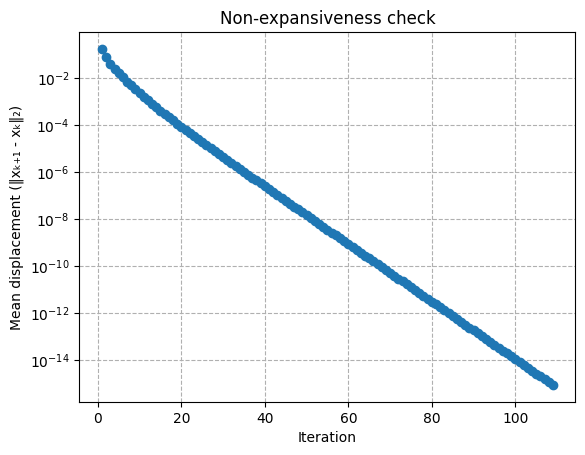

In [4]:
distances, factors = check_non_expansive(dist_to_previous, plot=True)

In [5]:
print("Distances between iterations:", distances)
print("Growth factors:", factors)
print("Max growth factor:", max(factors))

Distances between iterations: [0.16586739479705753, 0.07347096652380364, 0.03950728440648653, 0.02434825429142333, 0.01505871673777705, 0.010151327528085542, 0.006626065388607617, 0.004647889431472256, 0.0031357246703203915, 0.0022337344249628334, 0.001538361283155182, 0.001108060263151381, 0.0007761084597592864, 0.0005635154115733505, 0.00039997923353388707, 0.0002925689881690719, 0.00020994268110415175, 0.00015458447702435717, 0.00011198274617217067, 8.290484679288942e-05, 6.052463143455415e-05, 4.502570912673455e-05, 3.306470498295794e-05, 2.4710095714029437e-05, 1.823191033092186e-05, 1.3674664049470471e-05, 1.012978812476411e-05, 7.616100994240157e-06, 5.660536060283627e-06, 4.262008877651626e-06, 3.176229570388627e-06, 2.3935194516643173e-06, 1.7874973053838934e-06, 1.3478082508494865e-06, 1.0081724403522132e-06, 7.605467477308984e-07, 5.696138090415482e-07, 4.2987921142070213e-07, 3.223053779353557e-07, 2.433093981254838e-07, 1.8261347692473364e-07, 1.3786832112762886e-07, 1.035